In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as wr
wr.filterwarnings('ignore')
%matplotlib inline

In [2]:
# Load Dataset
web_df = pd.read_csv('website_wata.csv')
web_df

,Page Views,Session Duration,Bounce Rate,Traffic Source,Time on Page,Previous Visits,Conversion Rate
0,5,11.051381,0.230652,Organic,3.890460,3,1.0
1,4,3.429316,0.391001,Social,8.478174,0,1.0
2,4,1.621052,0.397986,Organic,9.636170,2,1.0
3,5,3.629279,0.180458,Organic,2.071925,3,1.0
4,5,4.235843,0.291541,Paid,1.960654,5,1.0
...,...,...,...,...,...,...,...
1995,1,2.724513,0.207187,Referral,1.324206,2,1.0
1996,3,0.392856,0.095559,Organic,3.824416,1,1.0
1997,4,9.899823,0.446622,Organic,1.288675,1,1.0
1998,3,0.393319,0.278340,Paid,5.037584,2,1.0


In [3]:
# Dataset First 5 rows
web_df.head()

,Page Views,Session Duration,Bounce Rate,Traffic Source,Time on Page,Previous Visits,Conversion Rate
0,5,11.051381,0.230652,Organic,3.890460,3,1.0
1,4,3.429316,0.391001,Social,8.478174,0,1.0
2,4,1.621052,0.397986,Organic,9.636170,2,1.0
3,5,3.629279,0.180458,Organic,2.071925,3,1.0
4,5,4.235843,0.291541,Paid,1.960654,5,1.0


In [4]:
# Dataset last 5 rows
web_df.tail()

,Page Views,Session Duration,Bounce Rate,Traffic Source,Time on Page,Previous Visits,Conversion Rate
1995,1,2.724513,0.207187,Referral,1.324206,2,1.0
1996,3,0.392856,0.095559,Organic,3.824416,1,1.0
1997,4,9.899823,0.446622,Organic,1.288675,1,1.0
1998,3,0.393319,0.278340,Paid,5.037584,2,1.0
1999,3,0.882638,0.338026,Direct,5.186908,3,1.0


In [6]:
# Dataset Rows & Columns count
print(web_df.shape)

(2000, 7)


In [7]:
# Dataset Info
web_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Page Views        2000 non-null   int64  
 1   Session Duration  2000 non-null   float64
 2   Bounce Rate       2000 non-null   float64
 3   Traffic Source    2000 non-null   object 
 4   Time on Page      2000 non-null   float64
 5   Previous Visits   2000 non-null   int64  
 6   Conversion Rate   2000 non-null   float64
dtypes: float64(4), int64(2), object(1)
memory usage: 109.5+ KB


In [12]:
web_df.columns

Index(['Page Views', 'Session Duration', 'Bounce Rate', 'Traffic Source',
       'Time on Page', 'Previous Visits', 'Conversion Rate'],
      dtype='object')

In [8]:
# Dataset Duplicate or Non Duplicate Value Count
web_df.duplicated().value_counts()

False    2000
Name: count, dtype: int64

In [9]:
# Dataset Duplicate Value Count
len(web_df[web_df.duplicated()])

0

In [10]:
# Missing Values/Null Values Count
print(web_df.isnull().sum())

Page Views          0
Session Duration    0
Bounce Rate         0
Traffic Source      0
Time on Page        0
Previous Visits     0
Conversion Rate     0
dtype: int64


<Axes: >

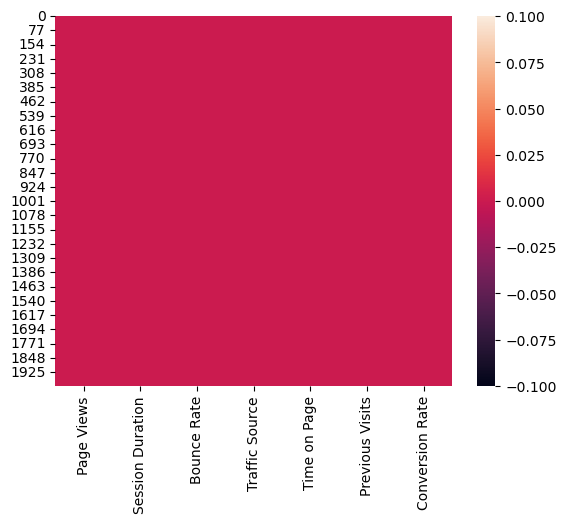

In [11]:
# Visualizing the missing values
sns.heatmap(web_df.isnull())

In [41]:
# Dataset Describe
web_df.describe().style.background_gradient()

,Page Views,Session Duration,Bounce Rate,Time on Page,Previous Visits,Conversion Rate
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,4.950500,3.022045,0.284767,4.027439,1.978500,0.982065
std,2.183903,3.104518,0.159781,2.887422,1.432852,0.065680
min,0.000000,0.003613,0.007868,0.068515,0.000000,0.343665
25%,3.000000,0.815828,0.161986,1.935037,1.000000,1.000000
50%,5.000000,1.993983,0.266375,3.315316,2.000000,1.000000
75%,6.000000,4.197569,0.388551,5.414627,3.000000,1.000000
max,14.000000,20.290516,0.844939,24.796182,9.000000,1.000000


### Variable Description

1. Page Views: Number of pages viewed.

2. Session Duration: Duration of the session in minutes.

3. Bounce Rate: Percentage of visitors who leave the site after viewing only one page.

4. Traffic Source: The source of the traffic (e.g., Organic, Paid, Social, etc.).

5. Time on Page: Time spent on a specific page in minutes.

6. Previous Visits: Number of previous visits by the user.

7. Conversion Rate: Whether the user converted during the session (1 = yes, 0 = no).

## Traffic Source distribution

Text(0.5, 1.0, 'Traffic Source Distribution')

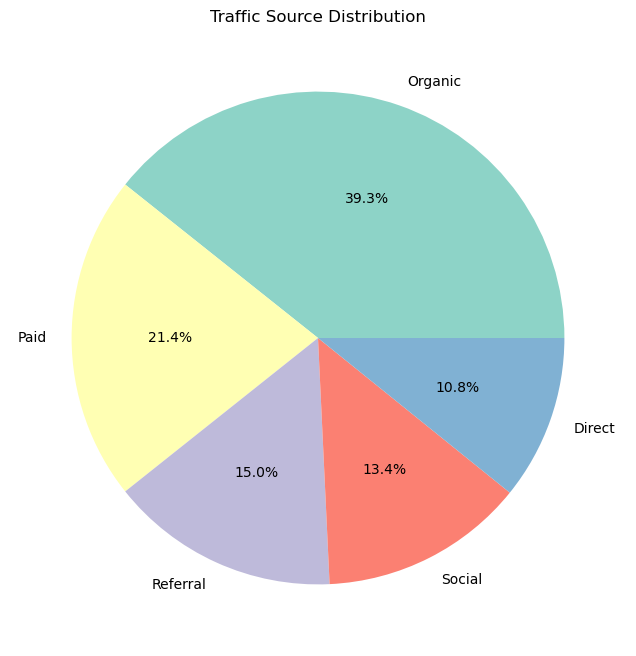

In [60]:
# Set up the visualizations
plt.figure(figsize=(8, 8))
traffic_counts = web_df['Traffic Source'].value_counts()
plt.pie(traffic_counts, labels=traffic_counts.index, autopct='%1.1f%%', colors=sns.color_palette("Set3"))
plt.title('Traffic Source Distribution')

## Page Views vs Bounce Rate.

Text(0.5, 1.0, 'Page Views vs Bounce Rate')

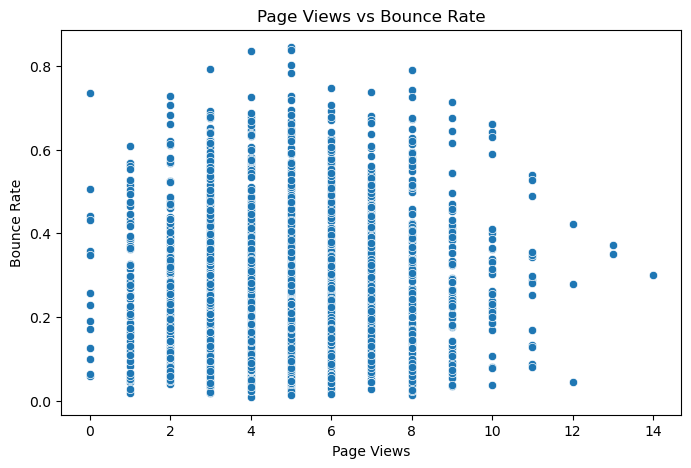

In [23]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Page Views', y='Bounce Rate', data=web_df)
plt.title('Page Views vs Bounce Rate')

## Session Duration by Traffic Source

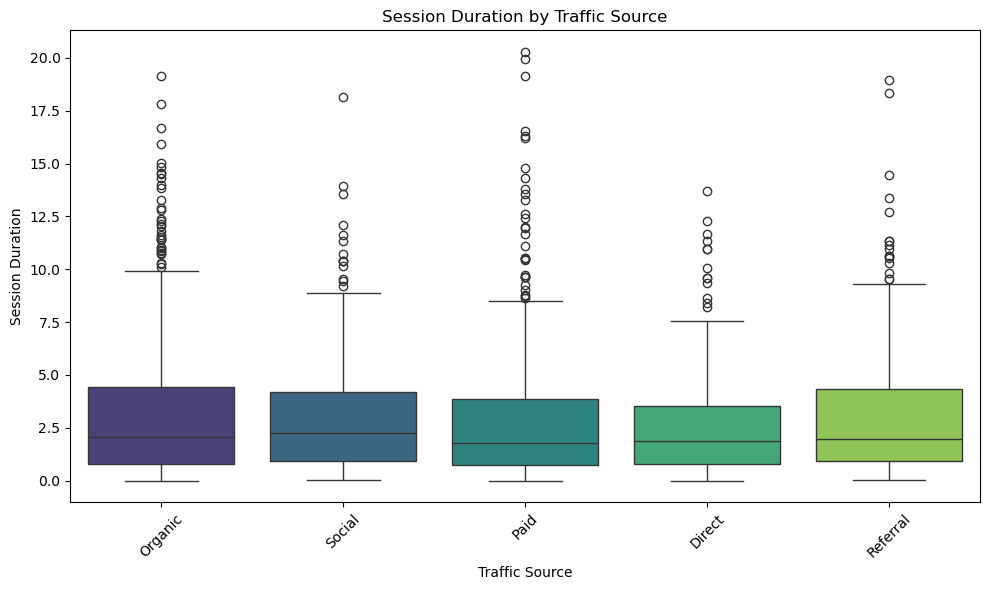

In [65]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Traffic Source', y='Session Duration', data=web_df, palette='viridis')
plt.title('Session Duration by Traffic Source')
plt.xlabel('Traffic Source')
plt.ylabel('Session Duration')
plt.xticks(rotation=45)
plt.tight_layout()

## Time on Page by Traffic Source

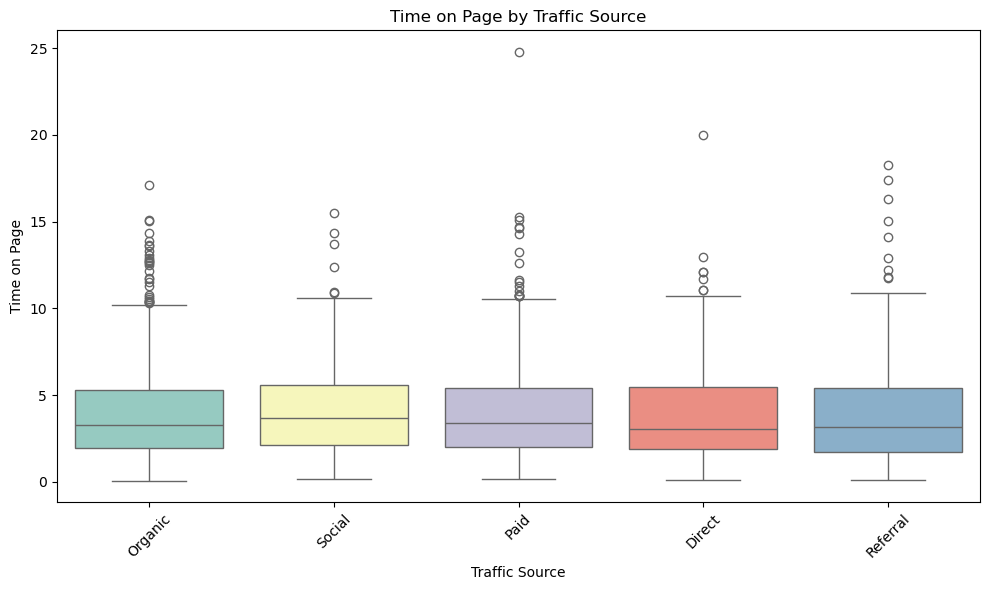

In [63]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Traffic Source', y='Time on Page', data=web_df, palette='Set3')
plt.title('Time on Page by Traffic Source')
plt.xlabel('Traffic Source')
plt.ylabel('Time on Page')
plt.xticks(rotation=45)
plt.tight_layout()

## Conversion Rate by Previous Visits

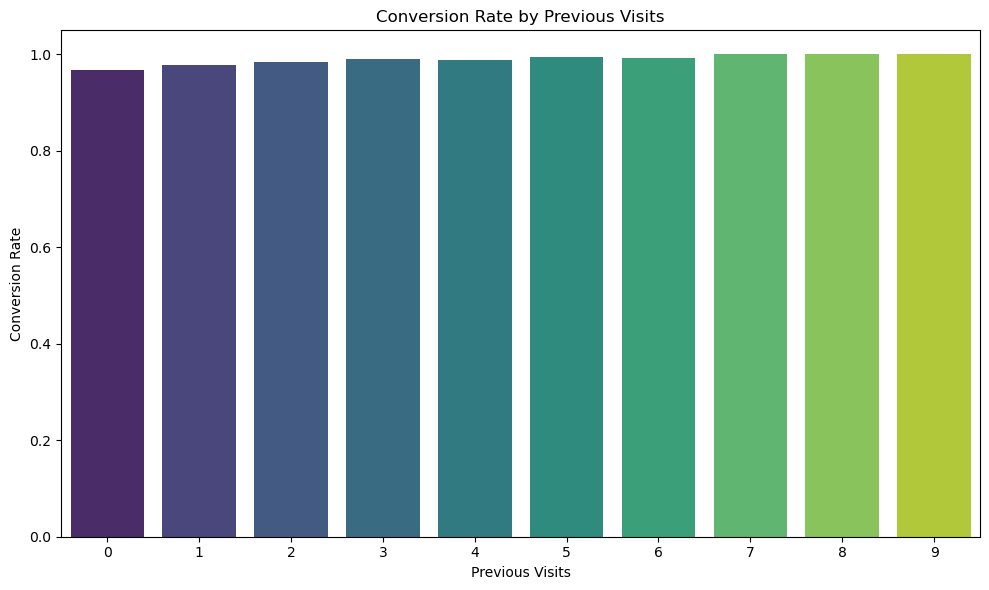

In [44]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Previous Visits', y='Conversion Rate', data=web_df, ci=None, palette='viridis')
plt.title('Conversion Rate by Previous Visits')
plt.tight_layout()

## Distribution of Page Views across different Traffic Sources

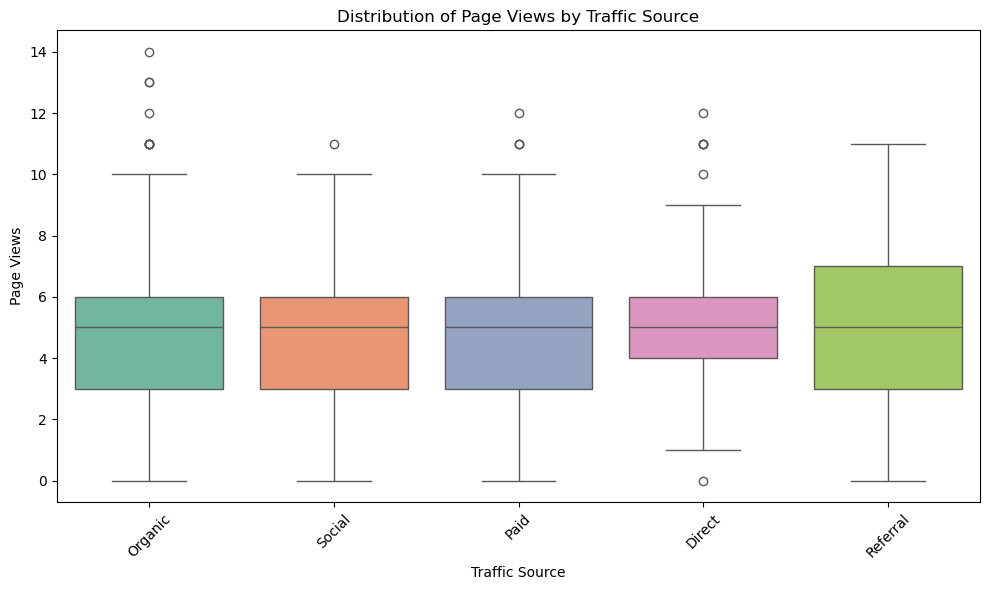

In [45]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Traffic Source', y='Page Views', data=web_df, palette='Set2')
plt.title('Distribution of Page Views by Traffic Source')
plt.xlabel('Traffic Source')
plt.ylabel('Page Views')
plt.xticks(rotation=45)
plt.tight_layout()

## Average Session Duration across Traffic Sources

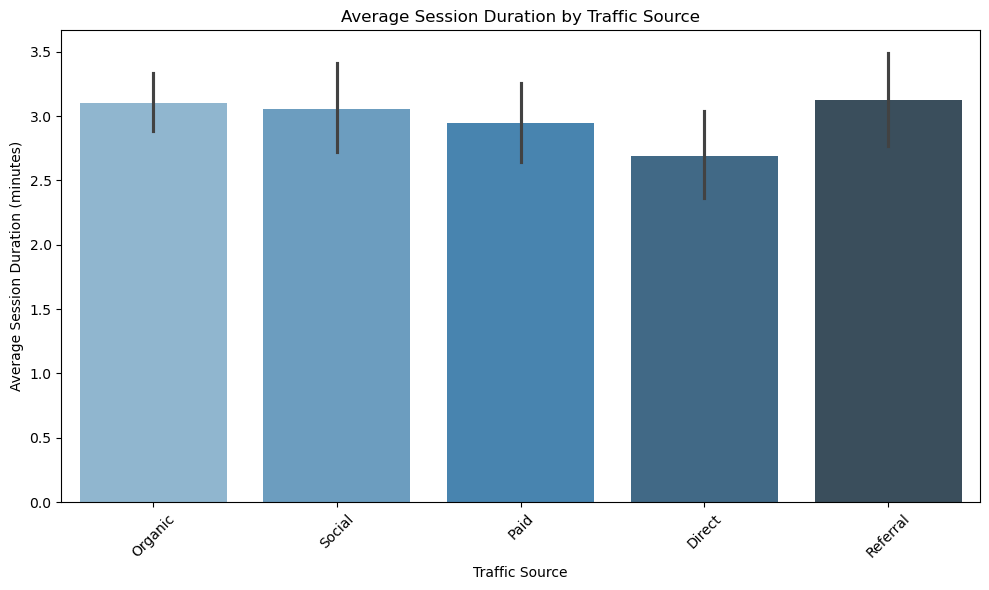

In [46]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Traffic Source', y='Session Duration', data=web_df, palette='Blues_d')
plt.title('Average Session Duration by Traffic Source')
plt.xlabel('Traffic Source')
plt.ylabel('Average Session Duration (minutes)')
plt.xticks(rotation=45)
plt.tight_layout()

## Relationship between Time on Page and Conversion Rate

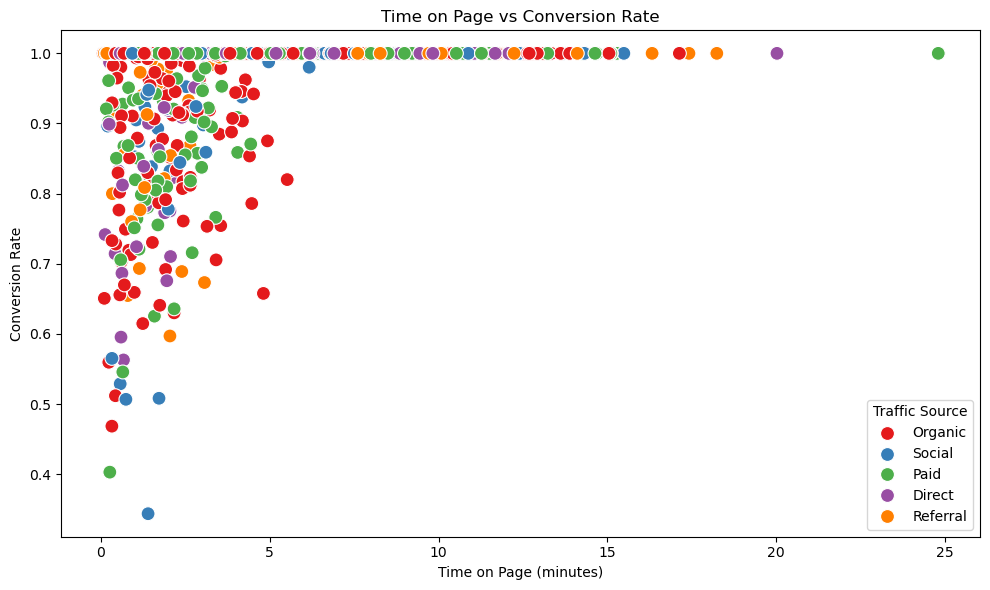

In [47]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Time on Page', y='Conversion Rate', data=web_df, hue='Traffic Source', palette='Set1', s=100)
plt.title('Time on Page vs Conversion Rate')
plt.xlabel('Time on Page (minutes)')
plt.ylabel('Conversion Rate')
plt.legend(title='Traffic Source')
plt.tight_layout()

## Bounce Rate across different Traffic Sources

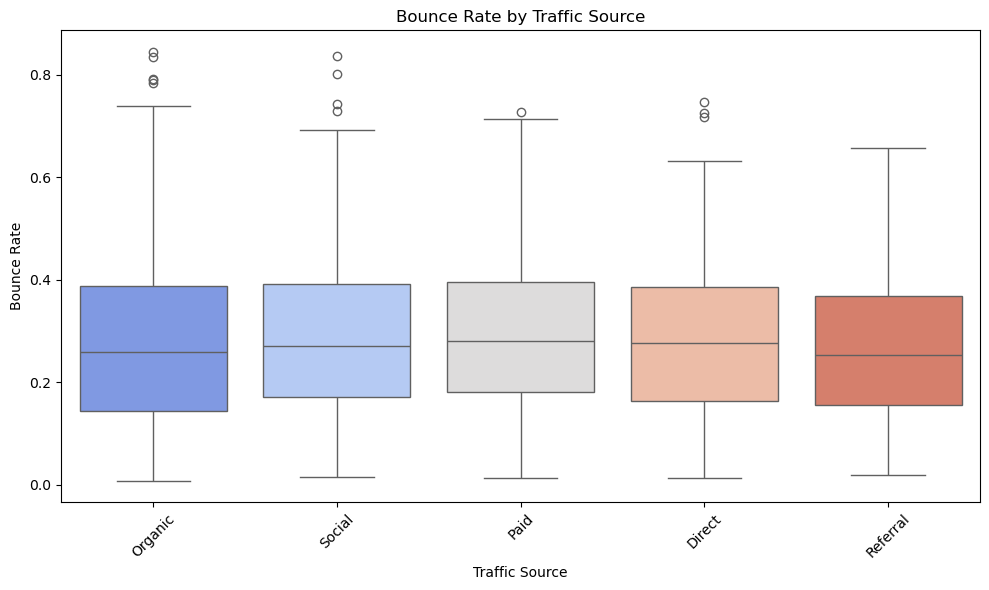

In [48]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Traffic Source', y='Bounce Rate', data=web_df, palette='coolwarm')
plt.title('Bounce Rate by Traffic Source')
plt.xlabel('Traffic Source')
plt.ylabel('Bounce Rate')
plt.xticks(rotation=45)
plt.tight_layout()

## Page Views vs Conversion Rate

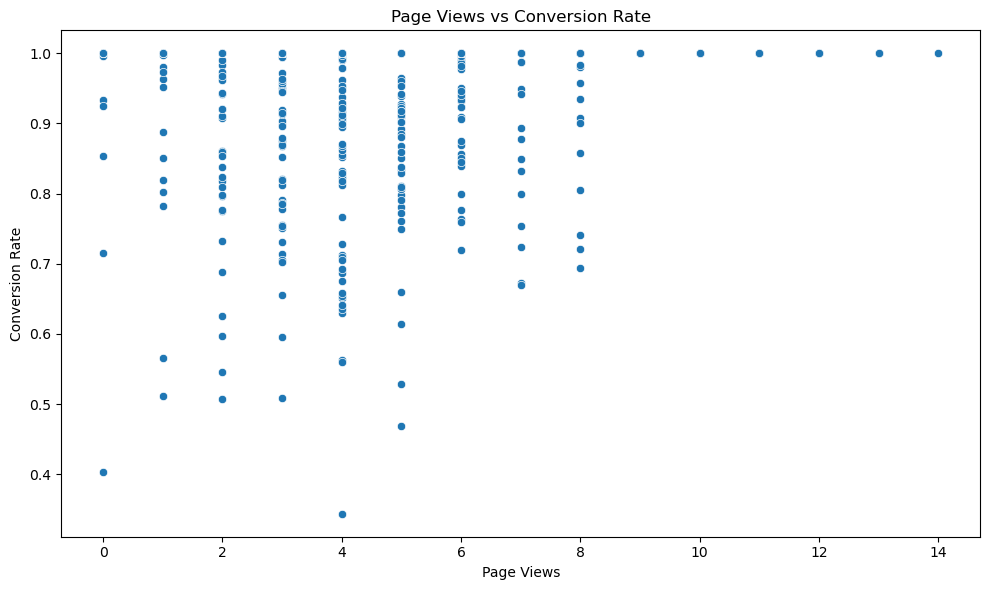

In [40]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Page Views', y='Conversion Rate', data=web_df)
plt.title('Page Views vs Conversion Rate')
plt.tight_layout()